In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('C:/Users/somya/Downloads/Hybrid Model for Crypto Volatility Prediction using Sentiment Analysis/Data_set/reddit_market_combined_data.csv')

In [4]:
df.head()

,Unnamed: 0,price,total_volume,market_cap,coin_name,bitcoin_returns,bitcoin_volatility,score,No_Comments,title_sentiment,...,title_sentiment_lag5,title_sentiment_lag6,title_sentiment_lag7,description_sentiment_lag1,description_sentiment_lag2,description_sentiment_lag3,description_sentiment_lag4,description_sentiment_lag5,description_sentiment_lag6,description_sentiment_lag7
0,2015-01-01,313.992,4.699936e+07,4.293958e+09,bitcoin,0.002189,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.732676,0.733003,0.733332,0.733627,0.733908,0.734206,0.734516
1,2015-01-02,314.446,3.885591e+07,4.301448e+09,bitcoin,0.001446,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.997183,0.733003,0.733332,0.733627,0.733908,0.734206,0.734516
2,2015-01-03,286.572,1.187789e+08,3.921358e+09,bitcoin,-0.088645,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.997183,0.997183,0.733332,0.733627,0.733908,0.734206,0.734516
3,2015-01-04,260.936,2.055001e+08,3.571640e+09,bitcoin,-0.089457,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.997183,0.997183,0.997183,0.733627,0.733908,0.734206,0.734516
4,2015-01-05,273.220,1.550381e+08,3.740880e+09,bitcoin,0.047077,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.997183,0.997183,0.997183,0.997183,0.733908,0.734206,0.734516


In [25]:
df=df.rename(columns={'Unnamed: 0':'timestamp'})

In [27]:
df.reset_index(inplace=True)


In [28]:
df.head()

,timestamp,price,total_volume,market_cap,coin_name,bitcoin_returns,bitcoin_volatility,score,No_Comments,title_sentiment,...,title_sentiment_lag5,title_sentiment_lag6,title_sentiment_lag7,description_sentiment_lag1,description_sentiment_lag2,description_sentiment_lag3,description_sentiment_lag4,description_sentiment_lag5,description_sentiment_lag6,description_sentiment_lag7
0,2015-01-01,313.992,4.699936e+07,4.293958e+09,bitcoin,0.002189,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.732676,0.733003,0.733332,0.733627,0.733908,0.734206,0.734516
1,2015-01-02,314.446,3.885591e+07,4.301448e+09,bitcoin,0.001446,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.997183,0.733003,0.733332,0.733627,0.733908,0.734206,0.734516
2,2015-01-03,286.572,1.187789e+08,3.921358e+09,bitcoin,-0.088645,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.997183,0.997183,0.733332,0.733627,0.733908,0.734206,0.734516
3,2015-01-04,260.936,2.055001e+08,3.571640e+09,bitcoin,-0.089457,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.997183,0.997183,0.997183,0.733627,0.733908,0.734206,0.734516
4,2015-01-05,273.220,1.550381e+08,3.740880e+09,bitcoin,0.047077,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.997183,0.997183,0.997183,0.997183,0.733908,0.734206,0.734516


In [29]:
df.head()

,timestamp,price,total_volume,market_cap,coin_name,bitcoin_returns,bitcoin_volatility,score,No_Comments,title_sentiment,...,title_sentiment_lag5,title_sentiment_lag6,title_sentiment_lag7,description_sentiment_lag1,description_sentiment_lag2,description_sentiment_lag3,description_sentiment_lag4,description_sentiment_lag5,description_sentiment_lag6,description_sentiment_lag7
0,2015-01-01,313.992,4.699936e+07,4.293958e+09,bitcoin,0.002189,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.732676,0.733003,0.733332,0.733627,0.733908,0.734206,0.734516
1,2015-01-02,314.446,3.885591e+07,4.301448e+09,bitcoin,0.001446,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.997183,0.733003,0.733332,0.733627,0.733908,0.734206,0.734516
2,2015-01-03,286.572,1.187789e+08,3.921358e+09,bitcoin,-0.088645,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.997183,0.997183,0.733332,0.733627,0.733908,0.734206,0.734516
3,2015-01-04,260.936,2.055001e+08,3.571640e+09,bitcoin,-0.089457,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.997183,0.997183,0.997183,0.733627,0.733908,0.734206,0.734516
4,2015-01-05,273.220,1.550381e+08,3.740880e+09,bitcoin,0.047077,0.626246,19.019289,6.0,0.999642,...,0.763767,0.764063,0.764378,0.997183,0.997183,0.997183,0.997183,0.733908,0.734206,0.734516


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   3739 non-null   object 
 1   price                       3739 non-null   float64
 2   total_volume                3739 non-null   float64
 3   market_cap                  3738 non-null   float64
 4   coin_name                   3739 non-null   object 
 5   bitcoin_returns             3739 non-null   float64
 6   bitcoin_volatility          3739 non-null   float64
 7   score                       3739 non-null   float64
 8   No_Comments                 3739 non-null   float64
 9   title_sentiment             3739 non-null   float64
 10  description_sentiment       3739 non-null   float64
 11  score_lag1                  3739 non-null   float64
 12  score_lag2                  3739 non-null   float64
 13  score_lag3                  3739 

In [31]:
df.describe()

,price,total_volume,market_cap,bitcoin_returns,bitcoin_volatility,score,No_Comments,title_sentiment,description_sentiment,score_lag1,...,title_sentiment_lag5,title_sentiment_lag6,title_sentiment_lag7,description_sentiment_lag1,description_sentiment_lag2,description_sentiment_lag3,description_sentiment_lag4,description_sentiment_lag5,description_sentiment_lag6,description_sentiment_lag7
count,3739.000000,3.739000e+03,3.738000e+03,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,...,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000
mean,22001.088378,1.963901e+10,4.208943e+11,0.002189,0.626246,19.019289,23.547205,0.762390,0.732349,19.005209,...,0.763767,0.764063,0.764378,0.732676,0.733003,0.733332,0.733627,0.733908,0.734206,0.734517
std,24936.570848,2.161602e+10,4.905366e+11,0.036255,0.277180,11.625837,211.495444,0.586040,0.638023,11.593914,...,0.584828,0.584549,0.584232,0.637710,0.637397,0.637079,0.636824,0.636593,0.636332,0.636050
min,172.147900,1.823845e+07,2.362640e+09,-0.351903,0.151831,0.000000,0.000000,-0.999607,-0.999628,0.000000,...,-0.999607,-0.999607,-0.999607,-0.999628,-0.999628,-0.999628,-0.999628,-0.999628,-0.999628,-0.999628
25%,2772.096557,1.803531e+09,4.561869e+10,-0.012173,0.437828,19.019289,6.000000,0.999642,0.997183,19.019289,...,0.999642,0.999642,0.999642,0.997183,0.997183,0.997183,0.997183,0.997183,0.997183,0.997183
50%,10032.863112,1.634042e+10,1.797604e+11,0.001551,0.580394,19.019289,6.000000,0.999642,0.997183,19.019289,...,0.999642,0.999642,0.999642,0.997183,0.997183,0.997183,0.997183,0.997183,0.997183,0.997183
75%,35626.819491,3.006001e+10,6.745691e+11,0.016937,0.763973,19.019289,6.000000,0.999642,0.997183,19.019289,...,0.999642,0.999642,0.999642,0.997183,0.997183,0.997183,0.997183,0.997183,0.997183,0.997183
max,106182.236820,3.051904e+11,2.100630e+12,0.332556,1.829456,328.000000,5241.000000,0.999642,0.997183,328.000000,...,0.999642,0.999642,0.999642,0.997183,0.997183,0.997183,0.997183,0.997183,0.997183,0.997183


In [37]:
df['sentiment']=(df['title_sentiment']+df['description_sentiment'])/2

In [41]:
import numpy as np

def add_market_signal(df):
    conditions = [
        (df['sentiment'] > 0) & (df['bitcoin_returns'] > 0),
        (df['sentiment'] < 0) & (df['bitcoin_returns'] < 0)
    ]
    choices = ['Bullish', 'Bearish']
    
    df['market_signal'] = np.select(conditions, choices, default='Neutral')
    
    return df



In [42]:
df = add_market_signal(df)

In [43]:
df.head()

,timestamp,price,total_volume,market_cap,coin_name,bitcoin_returns,bitcoin_volatility,score,No_Comments,title_sentiment,...,title_sentiment_lag7,description_sentiment_lag1,description_sentiment_lag2,description_sentiment_lag3,description_sentiment_lag4,description_sentiment_lag5,description_sentiment_lag6,description_sentiment_lag7,sentiment,market_signal
0,2015-01-01,313.992,4.699936e+07,4.293958e+09,bitcoin,0.002189,0.626246,19.019289,6.0,0.999642,...,0.764378,0.732676,0.733003,0.733332,0.733627,0.733908,0.734206,0.734516,0.998413,Bullish
1,2015-01-02,314.446,3.885591e+07,4.301448e+09,bitcoin,0.001446,0.626246,19.019289,6.0,0.999642,...,0.764378,0.997183,0.733003,0.733332,0.733627,0.733908,0.734206,0.734516,0.998413,Bullish
2,2015-01-03,286.572,1.187789e+08,3.921358e+09,bitcoin,-0.088645,0.626246,19.019289,6.0,0.999642,...,0.764378,0.997183,0.997183,0.733332,0.733627,0.733908,0.734206,0.734516,0.998413,Neutral
3,2015-01-04,260.936,2.055001e+08,3.571640e+09,bitcoin,-0.089457,0.626246,19.019289,6.0,0.999642,...,0.764378,0.997183,0.997183,0.997183,0.733627,0.733908,0.734206,0.734516,0.998413,Neutral
4,2015-01-05,273.220,1.550381e+08,3.740880e+09,bitcoin,0.047077,0.626246,19.019289,6.0,0.999642,...,0.764378,0.997183,0.997183,0.997183,0.997183,0.733908,0.734206,0.734516,0.998413,Bullish


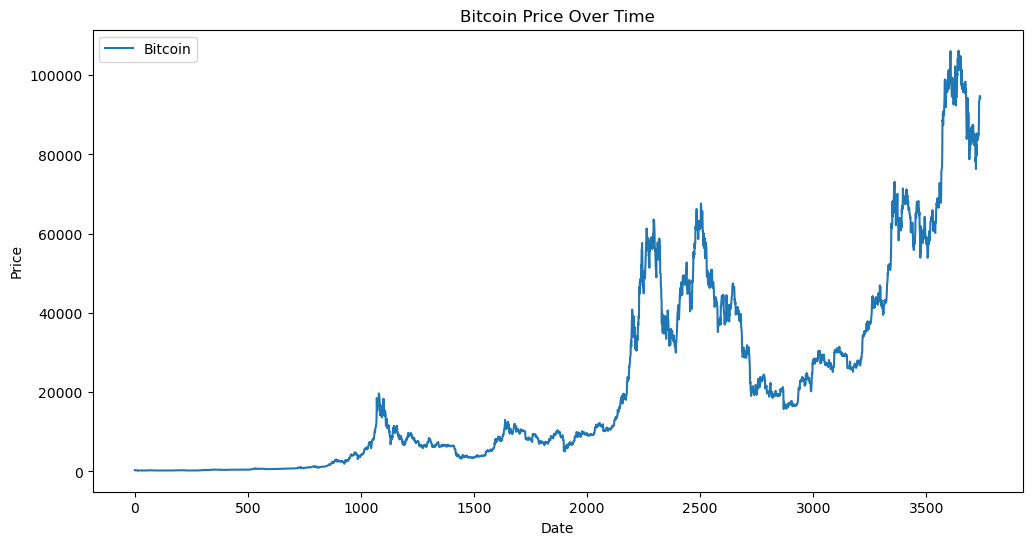

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['price'], label='Bitcoin')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


C:\Users\somya\AppData\Local\Temp\ipykernel_34732\344594649.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


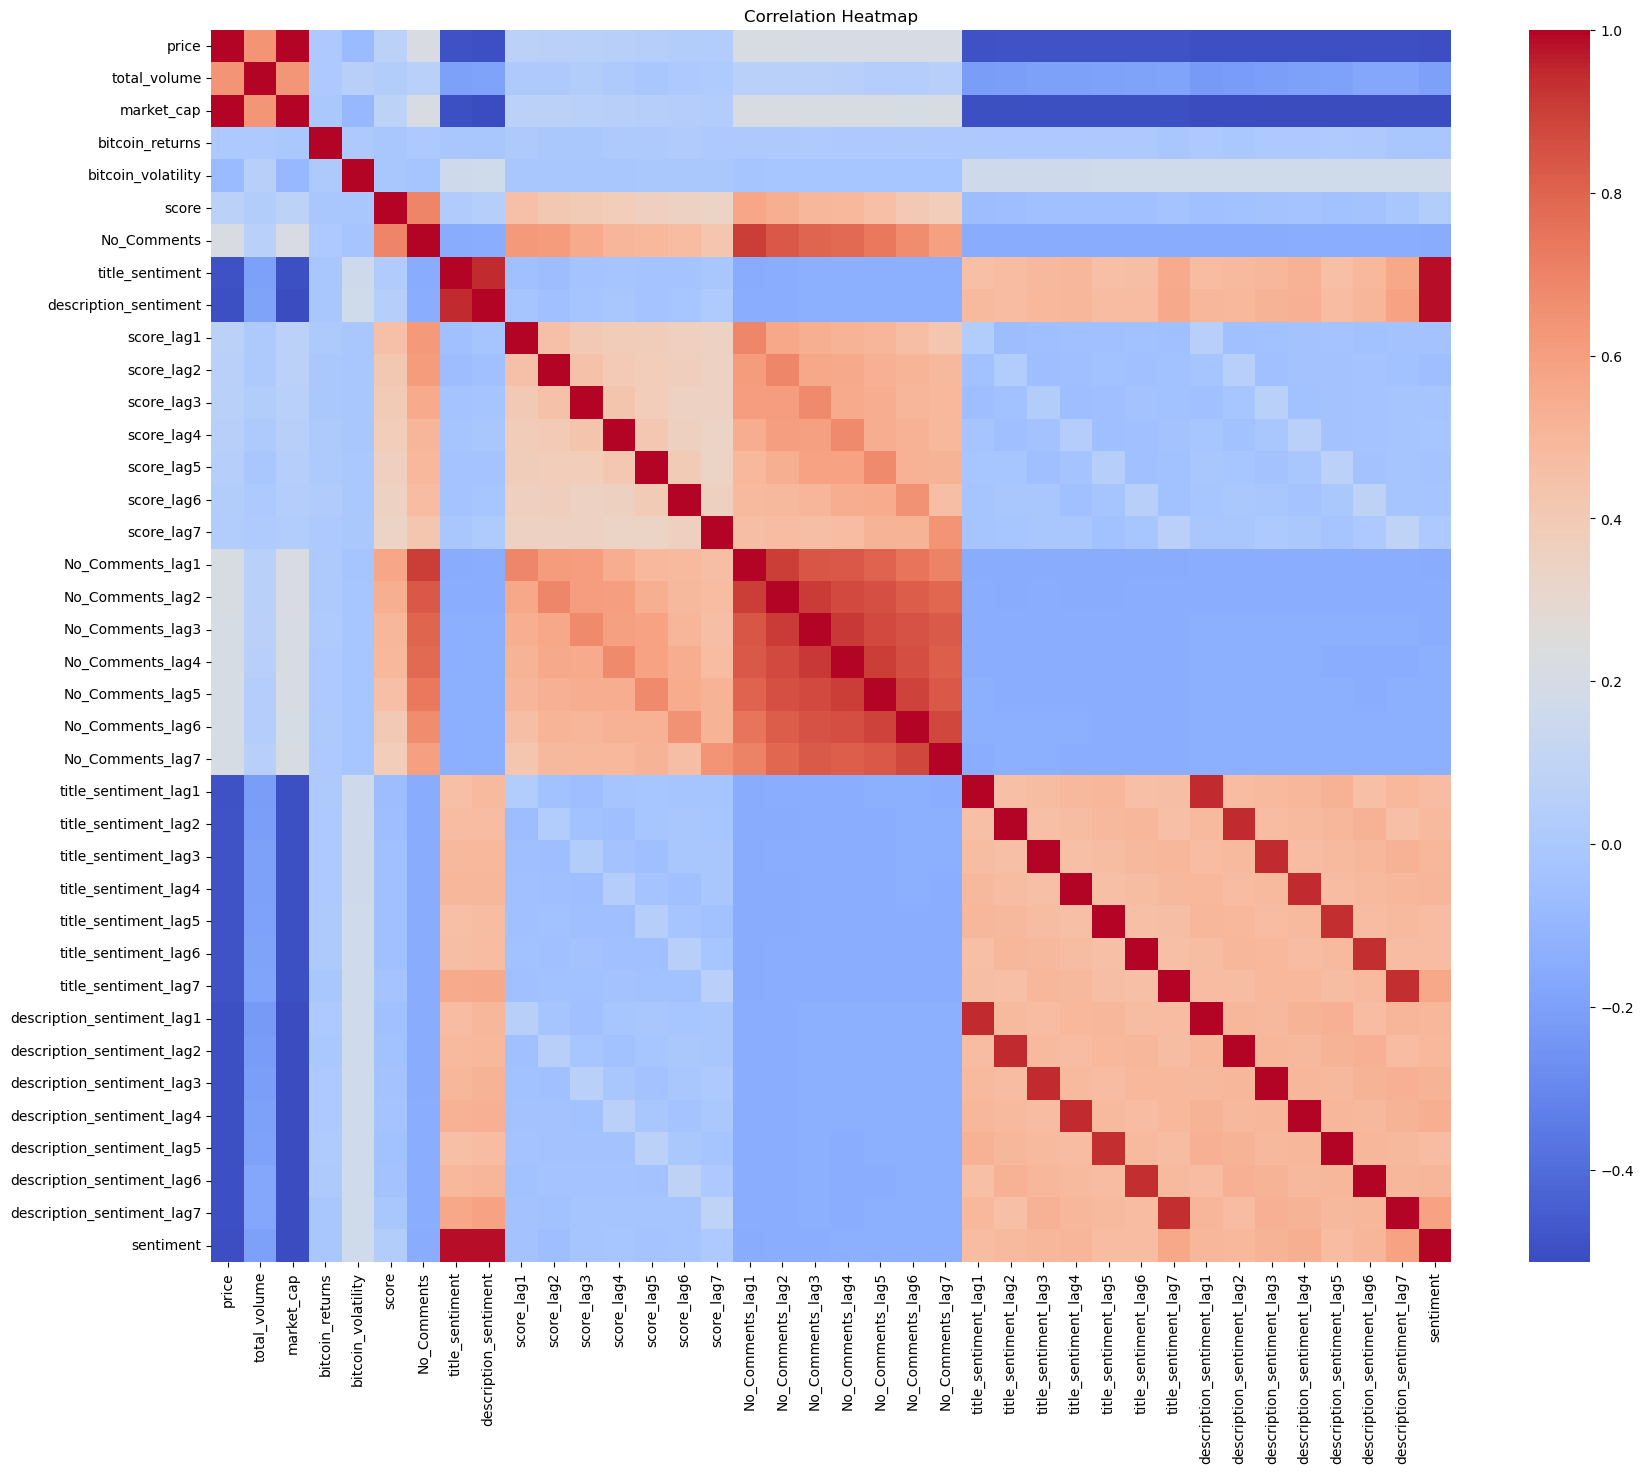

In [46]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

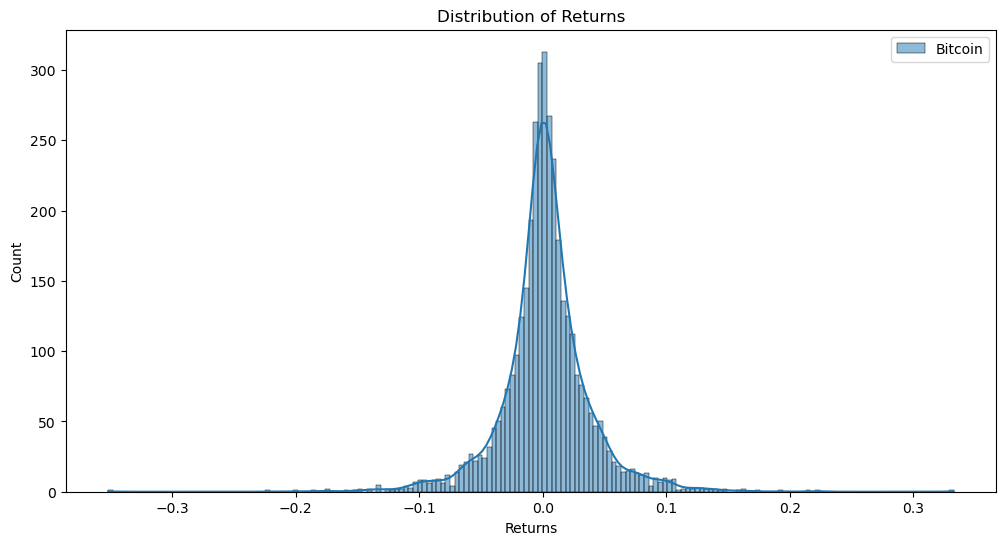

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(df['bitcoin_returns'], kde=True, label='Bitcoin')
plt.title('Distribution of Returns')
plt.xlabel('Returns')
plt.legend()
plt.show()


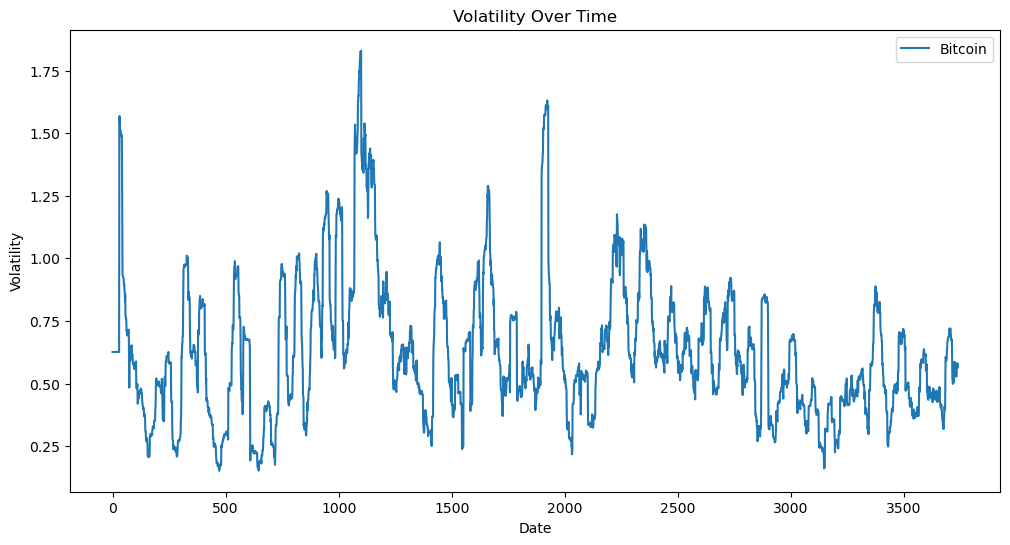

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bitcoin_volatility'], label='Bitcoin')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


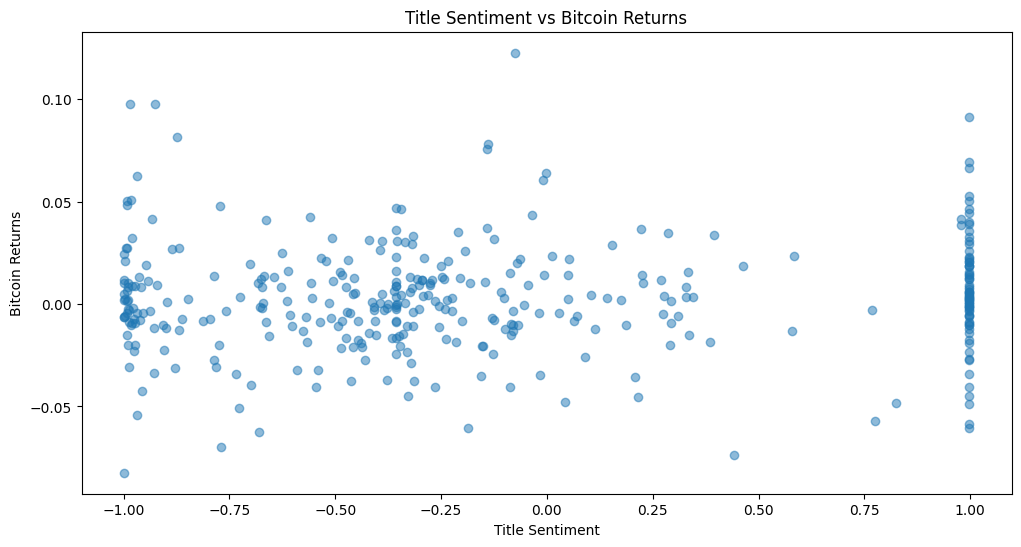

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(df['title_sentiment'], df['bitcoin_returns'], alpha=0.5)
plt.title('Title Sentiment vs Bitcoin Returns')
plt.xlabel('Title Sentiment')
plt.ylabel('Bitcoin Returns')
plt.show()


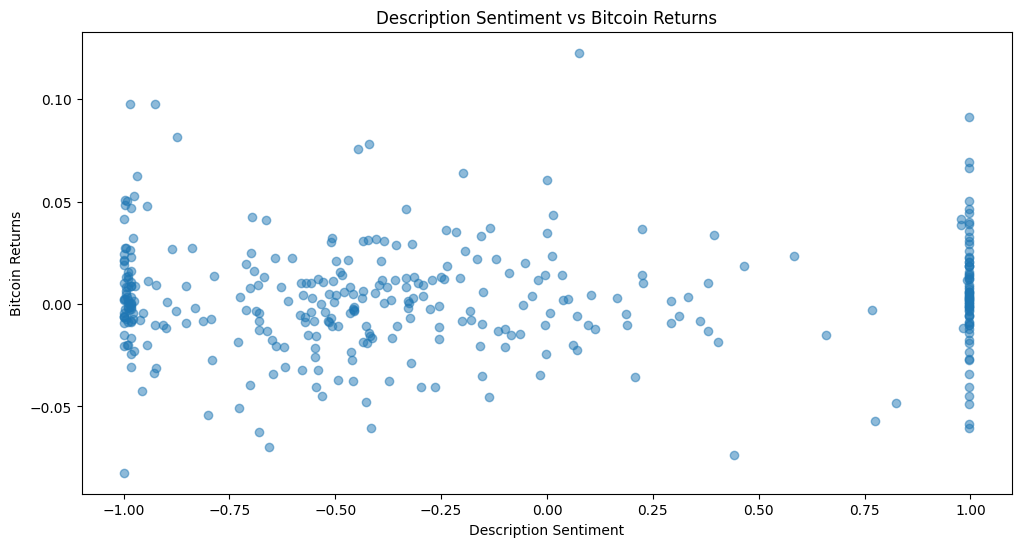

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(df['description_sentiment'], df['bitcoin_returns'], alpha=0.5)
plt.title('Description Sentiment vs Bitcoin Returns')
plt.xlabel('Description Sentiment')
plt.ylabel('Bitcoin Returns')
plt.show()


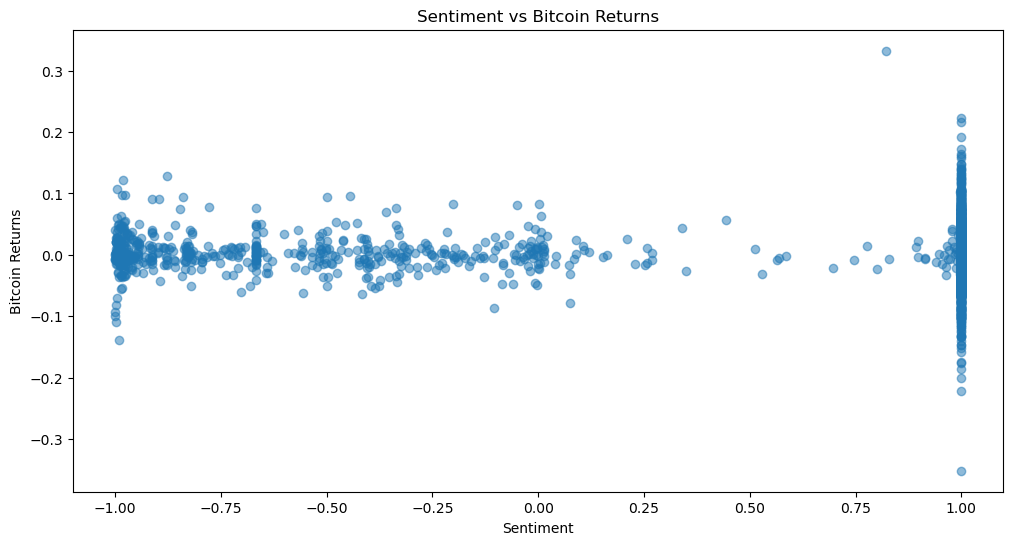

In [49]:
plt.figure(figsize=(12, 6))
plt.scatter(df['sentiment'], df['bitcoin_returns'], alpha=0.5)
plt.title('Sentiment vs Bitcoin Returns')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin Returns')
plt.show()


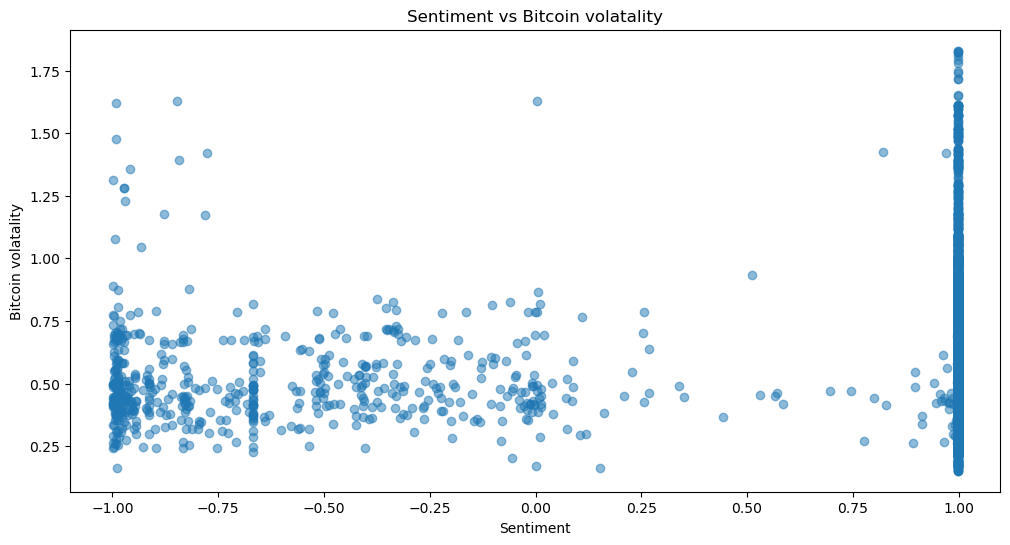

In [50]:
plt.figure(figsize=(12, 6))
plt.scatter(df['sentiment'], df['bitcoin_volatility'], alpha=0.5)
plt.title('Sentiment vs Bitcoin volatality')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin volatality')
plt.show()

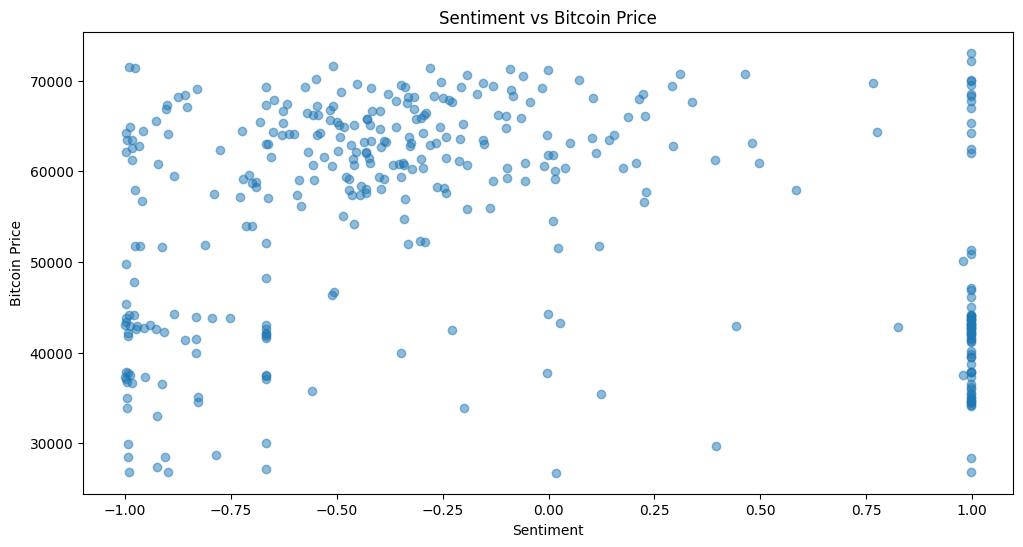

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(df['sentiment'], df['bitcoin_price'], alpha=0.5)
plt.title('Sentiment vs Bitcoin Price')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin Price')
plt.show()

In [52]:
target_correlations = df.corr()['bitcoin_volatility'].sort_values(ascending=False)
print("Top 10 correlated features with bitcoin_volatility:")
print(target_correlations.head(10))


Top 10 correlated features with bitcoin_volatility:
bitcoin_volatility            1.000000
description_sentiment_lag6    0.172589
description_sentiment_lag7    0.172174
description_sentiment_lag5    0.171956
sentiment                     0.169910
description_sentiment         0.169711
title_sentiment_lag5          0.169312
description_sentiment_lag1    0.168869
description_sentiment_lag4    0.168489
title_sentiment_lag6          0.168355
Name: bitcoin_volatility, dtype: float64


C:\Users\somya\AppData\Local\Temp\ipykernel_34732\4004298486.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_correlations = df.corr()['bitcoin_volatility'].sort_values(ascending=False)


In [58]:
X = df.drop(['bitcoin_volatility'], axis=1)
y = df['bitcoin_volatility']

In [69]:
X.fillna(X.mean(), inplace=True)

C:\Users\somya\AppData\Local\Temp\ipykernel_34732\642802493.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.fillna(X.mean(), inplace=True)


In [70]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Now apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)



In [72]:
print(X.isnull().sum())

timestamp                     0
price                         0
total_volume                  0
market_cap                    0
coin_name                     0
bitcoin_returns               0
score                         0
No_Comments                   0
title_sentiment               0
description_sentiment         0
score_lag1                    0
score_lag2                    0
score_lag3                    0
score_lag4                    0
score_lag5                    0
score_lag6                    0
score_lag7                    0
No_Comments_lag1              0
No_Comments_lag2              0
No_Comments_lag3              0
No_Comments_lag4              0
No_Comments_lag5              0
No_Comments_lag6              0
No_Comments_lag7              0
title_sentiment_lag1          0
title_sentiment_lag2          0
title_sentiment_lag3          0
title_sentiment_lag4          0
title_sentiment_lag5          0
title_sentiment_lag6          0
title_sentiment_lag7          0
descript

In [74]:
mi_scores = mutual_info_regression(X_scaled, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_numeric.columns)
mi_scores = mi_scores.sort_values(ascending=False)


In [75]:
print("\nTop 10 features by Mutual Information:")
print(mi_scores.head(10))



Top 10 features by Mutual Information:
price                         1.079901
market_cap                    1.078549
total_volume                  0.357025
score_lag7                    0.081444
score_lag6                    0.076906
description_sentiment_lag6    0.074232
score_lag5                    0.073034
title_sentiment_lag6          0.072894
title_sentiment_lag7          0.072732
description_sentiment_lag2    0.072280
Name: MI Scores, dtype: float64


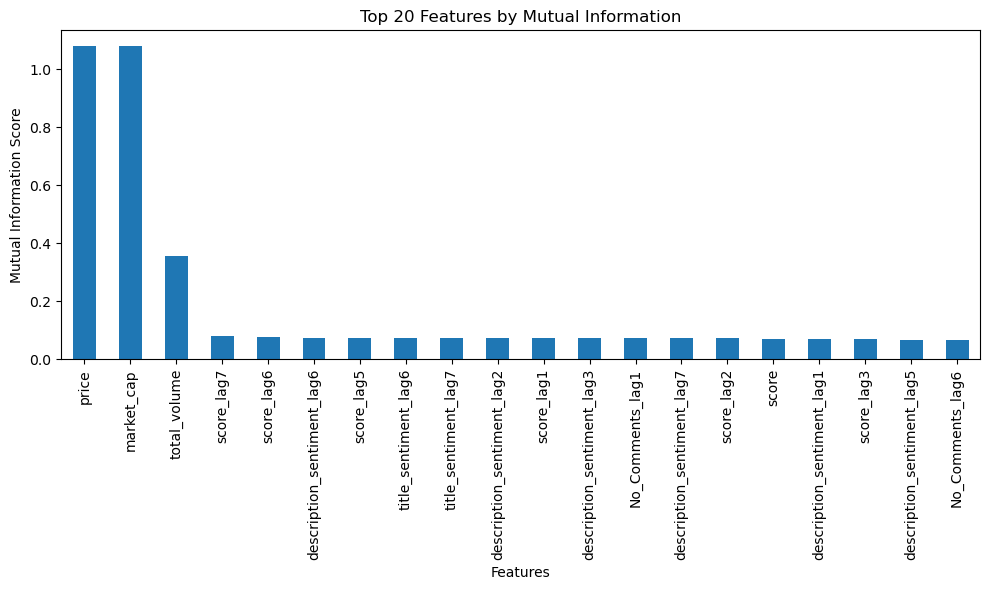

In [76]:
plt.figure(figsize=(10, 6))
mi_scores.head(20).plot(kind='bar')
plt.title('Top 20 Features by Mutual Information')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [77]:
for i in range(1,8):
    df[f"sentiment{i}"]=(df[f'title_sentiment_lag{i}']+df[f'description_sentiment_lag{i}'])/2

In [78]:
df['total_sentiment']=(df['sentiment']+df['sentiment1']+df['sentiment2']+df['sentiment3']+df["sentiment4"]+
                       df['sentiment5']+df['sentiment6']+df['sentiment7'])/8

    

Text(0, 0.5, 'Bitcoin Price')

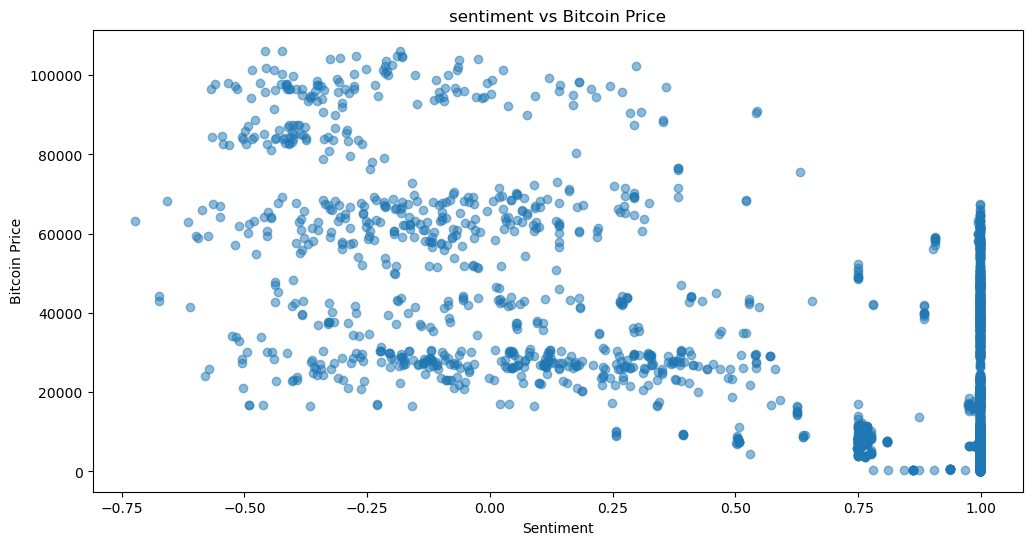

In [80]:
plt.figure(figsize=(12, 6))
plt.scatter(df['total_sentiment'], df['price'], alpha=0.5)
plt.title('sentiment vs Bitcoin Price')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin Price')

Text(0, 0.5, 'Bitcoin volatility')

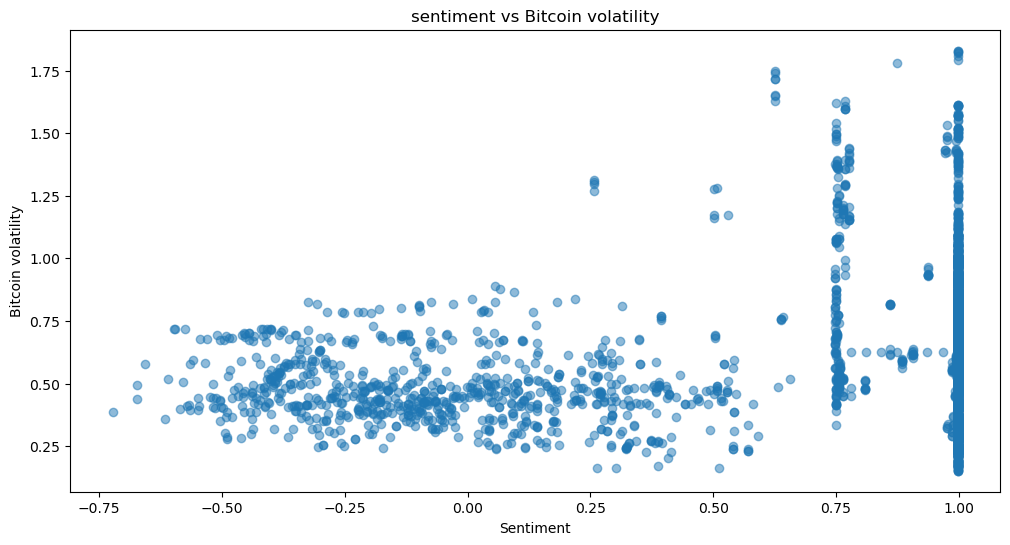

In [81]:
plt.figure(figsize=(12, 6))
plt.scatter(df['total_sentiment'], df['bitcoin_volatility'], alpha=0.5)
plt.title('sentiment vs Bitcoin volatility')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin volatility')

Text(0, 0.5, 'Bitcoin returns')

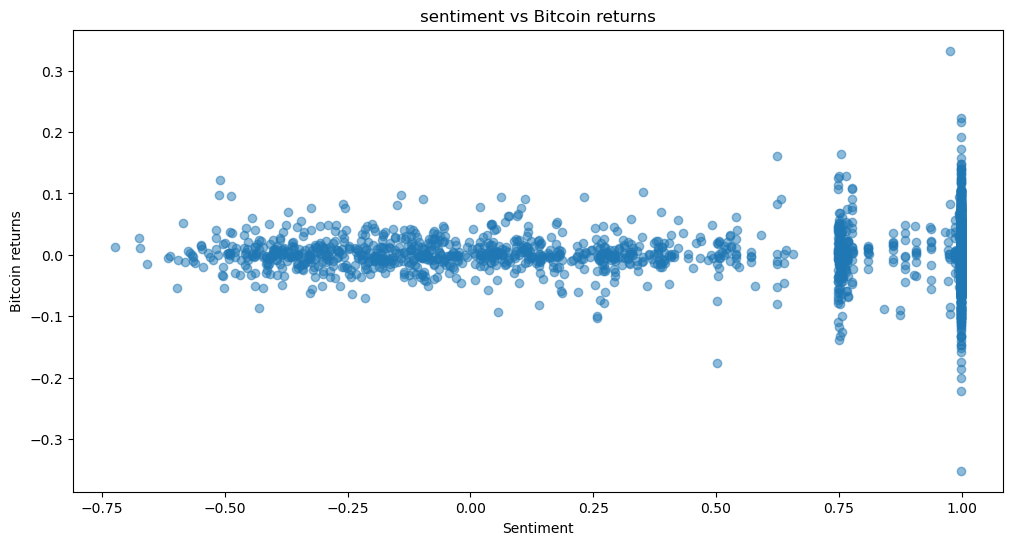

In [82]:
plt.figure(figsize=(12, 6))
plt.scatter(df['total_sentiment'], df['bitcoin_returns'], alpha=0.5)
plt.title('sentiment vs Bitcoin returns')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin returns')

In [89]:
import numpy as np

def add_market_signal(df):
    conditions = [
        (df['sentiment'] > 0) & (df['bitcoin_returns'] > 0),
        (df['sentiment'] < 0) & (df['bitcoin_returns'] < 0)
    ]
    choices = ['Bullish', 'Bearish']
    
    df['market_signal'] = np.select(conditions, choices, default='Neutral')
    
    return df



In [91]:
df = add_market_signal(df)

In [92]:
df.head()

,timestamp,price,total_volume,market_cap,coin_name,bitcoin_returns,bitcoin_volatility,score,No_Comments,title_sentiment,...,sentiment,market_signal,sentiment1,sentiment2,sentiment3,sentiment4,sentiment5,sentiment6,sentiment7,total_sentiment
0,2015-01-01,313.992,4.699936e+07,4.293958e+09,bitcoin,0.002189,0.626246,19.019289,6.0,0.999642,...,0.998413,Bullish,0.747671,0.747972,0.748282,0.748570,0.748837,0.749135,0.749447,0.779791
1,2015-01-02,314.446,3.885591e+07,4.301448e+09,bitcoin,0.001446,0.626246,19.019289,6.0,0.999642,...,0.998413,Bullish,0.998413,0.747972,0.748282,0.748570,0.748837,0.749135,0.749447,0.811134
2,2015-01-03,286.572,1.187789e+08,3.921358e+09,bitcoin,-0.088645,0.626246,19.019289,6.0,0.999642,...,0.998413,Neutral,0.998413,0.998413,0.748282,0.748570,0.748837,0.749135,0.749447,0.842439
3,2015-01-04,260.936,2.055001e+08,3.571640e+09,bitcoin,-0.089457,0.626246,19.019289,6.0,0.999642,...,0.998413,Neutral,0.998413,0.998413,0.998413,0.748570,0.748837,0.749135,0.749447,0.873705
4,2015-01-05,273.220,1.550381e+08,3.740880e+09,bitcoin,0.047077,0.626246,19.019289,6.0,0.999642,...,0.998413,Bullish,0.998413,0.998413,0.998413,0.998413,0.748837,0.749135,0.749447,0.904935


In [93]:
df.to_csv('final-data.csv')